In [28]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy

# Sampling

## Sample Distribution of a statistic

## Bootstrap

# Confidence Interval

# Distributions

## Normal

In [33]:
data = pd.DataFrame(np.random.normal(loc=0.0, scale=1.0, size=1000))
data.describe()

,0
count,1000.000000
mean,0.034257
std,1.000297
min,-3.063028
25%,-0.654451
50%,0.039687
75%,0.712896
max,2.895991


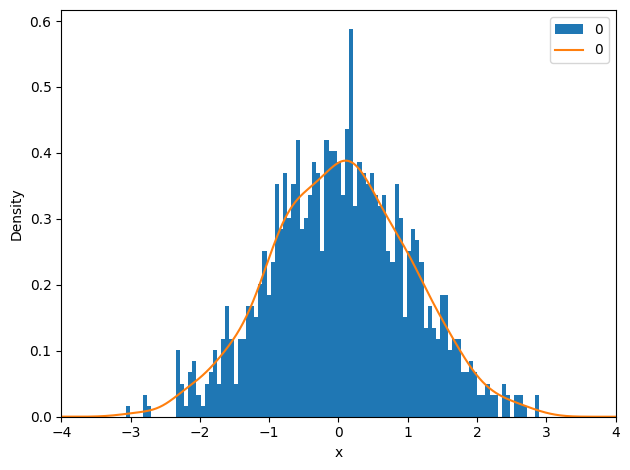

In [34]:
ax = data.plot.hist(
    density=True, xlim=[-4, 4], bins=100)
data.plot.density(ax=ax)
ax.set_xlabel('x')

plt.tight_layout()
plt.show()

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

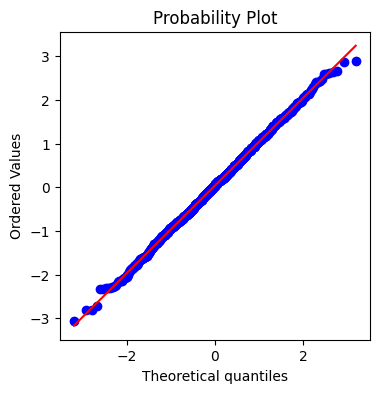

In [37]:
## QQ-Plot
fig, ax = plt.subplots(figsize=(4, 4))
scipy.stats.probplot(data.values.flatten(), plot=ax)

$X \sim N(\mu, \sigma^{2})$, $\mu$, $\sigma$为常数, $\sigma \gt 0$

pdf:

$$
f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{- \frac{(x - \mu)^{2}}{2 \sigma^{2}}}, -\infty \lt x  \lt \infty
$$

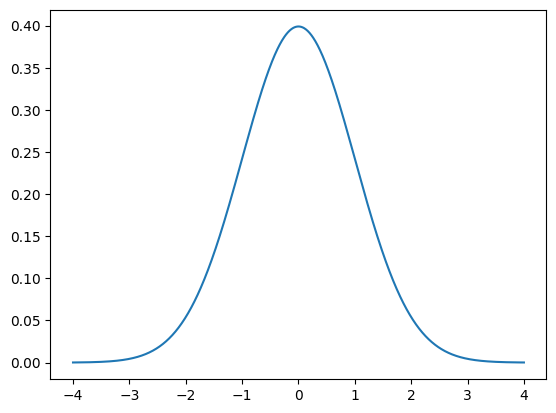

In [55]:
mu = 0
sigma = 1

def pdf(x):
  from math import sqrt, pi, exp
  return exp(-1.0 * (x - mu) * (x - mu) / (2.0 * sigma * sigma)) / (sqrt(2 * pi) * sigma)

xlim = mu + 4 * sigma 
x = np.linspace(start=-xlim, stop=xlim, dtype=np.float64, num=1000)
# https://numpy.org/doc/stable/reference/generated/numpy.frompyfunc.html
y = np.array(np.frompyfunc(pdf, 1, 1)(x), dtype=np.float64)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

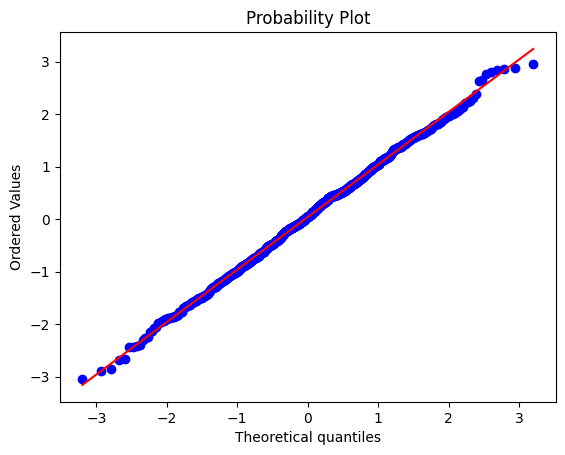

In [59]:
# QQ-Plot
fig, ax = plt.subplots()
scipy.stats.probplot(np.random.normal(size=1000), plot=ax)

## Long-Tailed

In [21]:
#  Practical Statistics for Data Scientists > 2. Data and Sampling Distributions
# 20.2 MB
sp500_px = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_data.csv.gz', index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [39]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
data = pd.DataFrame(nflx)
data.describe()

,0
count,1612.000000
mean,0.001556
std,1.488791
min,-6.605298
25%,-0.928374
50%,-0.037158
75%,0.858358
max,6.037870


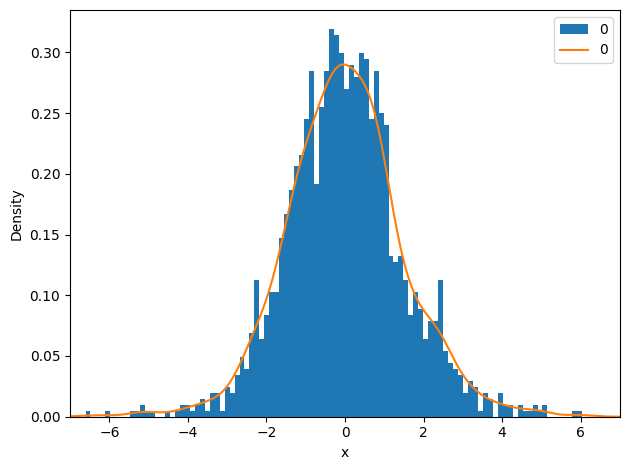

In [40]:
ax = data.plot.hist(
    density=True, xlim=[-7, 7], bins=100)
data.plot.density(ax=ax)
ax.set_xlabel('x')

plt.tight_layout()
plt.show()

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (np.float64(1.4823778663727092),
  np.float64(0.0015561067366313861),
  np.float64(0.9941828221936322)))

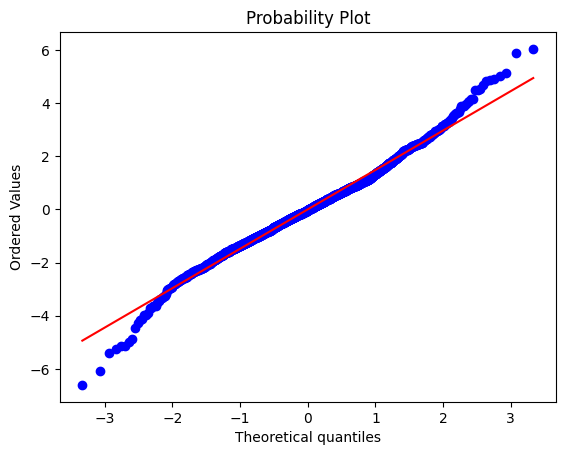

In [42]:
# QQ-Plot

fig, ax = plt.subplots()
scipy.stats.probplot(data.values.flatten(), plot=ax)

## Student's t

## Binomial

## Chi-Square

## F

## Posson

## Exponential

## Weibull